<div align="right"><sub>IN726 Data Science and Machine Intelligence (15 credits), Semester 1, 2020</sub>
</div>


# Assignment 2
Due Date: Friday, June 12th, 5pm.

Value: 25% of course mark

Every numbered task is worth 1 mark.

---

### Learning outcomes
- <font size="1">Analyse the principles, advantages, limitations and possible applications of machine learning</font>
- <font size="1">Generate solutions to solve machine learning problems and design and implement test procedures in order to evaluate the model.</font>
- <font size="1">Adapt mathematical intuition from Linear Algebra, Probability and Statistics to machine intelligence</font>
- <font size="1">Apply data mining techniques to fetch, scrub, explore, visualize, model, evaluate, and interpret data</font>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Time series analysis


Let's load some data about average monthly temperatures in New Zealand since 1853

In [2]:
dfM=pd.read_csv('./averageMonthlyTemperatureNZ.csv',index_col='date',parse_dates=True)
dfM

,AverageTemperature
date,
1853-01-01,13.387
1853-02-01,13.039
1853-03-01,11.643
1853-04-01,9.577
1853-05-01,7.286
...,...
2013-04-01,12.279
2013-05-01,9.006
2013-06-01,6.463


Let's calculate average yearly temperature in NZ:

In [3]:
dfY=dfM.resample('Y').mean()
dfY

,AverageTemperature
date,
1853-12-31,8.884250
1854-12-31,9.728917
1855-12-31,9.852083
1856-12-31,9.501833
1857-12-31,9.320917
...,...
2009-12-31,10.653583
2010-12-31,11.335750
2011-12-31,11.163250


Displaying the yearly time series:

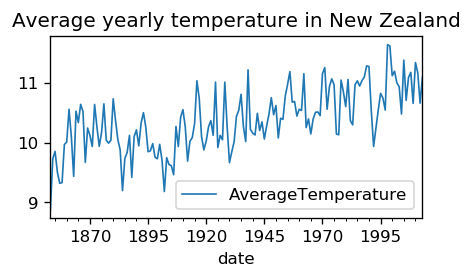

In [4]:
plt.rcParams.update({'figure.figsize': (4, 2), 'figure.dpi': 120})
dfY.plot(title="Average yearly temperature in New Zealand",linewidth=1)

Displaying the last 10 years of data in the monthly temperature time series:

(array([408, 420, 432, 444, 456, 468, 480, 492, 504, 516]),
 <a list of 10 Text xticklabel objects>)

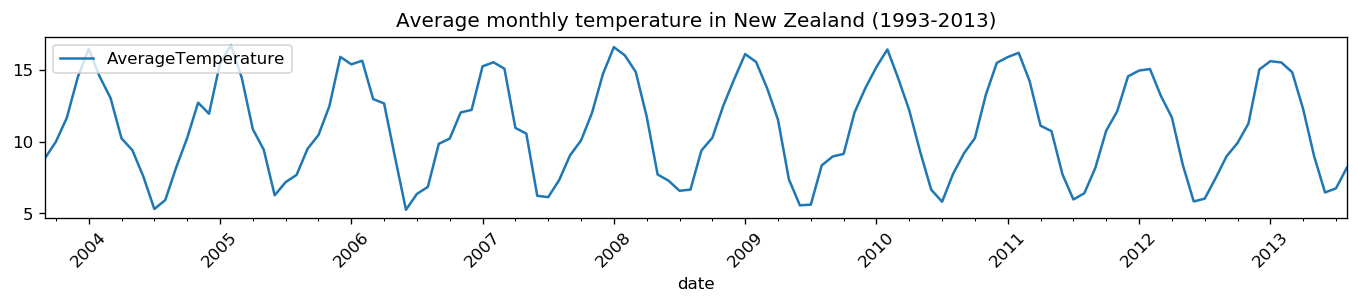

In [24]:
plt.rcParams.update({'figure.figsize': (14, 2), 'figure.dpi': 120})
dfM.iloc[-120:].plot(title="Average monthly temperature in New Zealand (1993-2013)")
plt.xticks(rotation=45)

#### 1. Is the monthly temperature time series stationary?

In [39]:

from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv('./averageMonthlyTemperatureNZ.csv', header=0, index_col=0, squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
print('The p value is less than 0.05 the data is stationary')

ADF Statistic: -4.721196
p-value: 0.000077
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


#### 2. Display the autocorrelation of the monthly temperature time series and explain the results you see

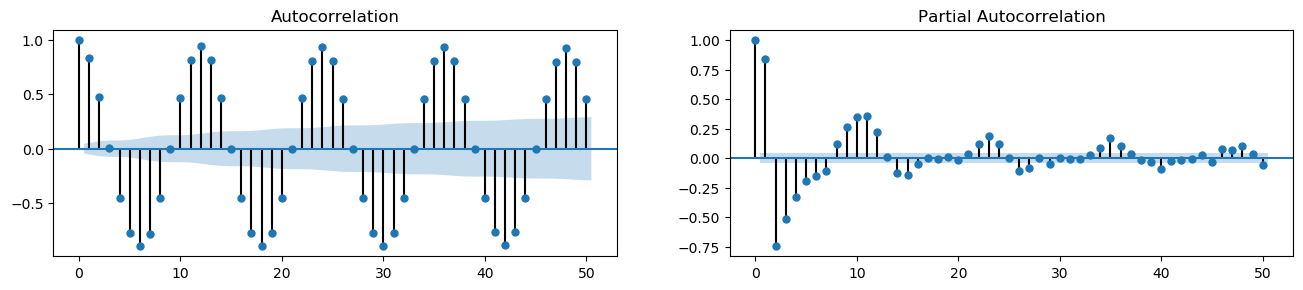

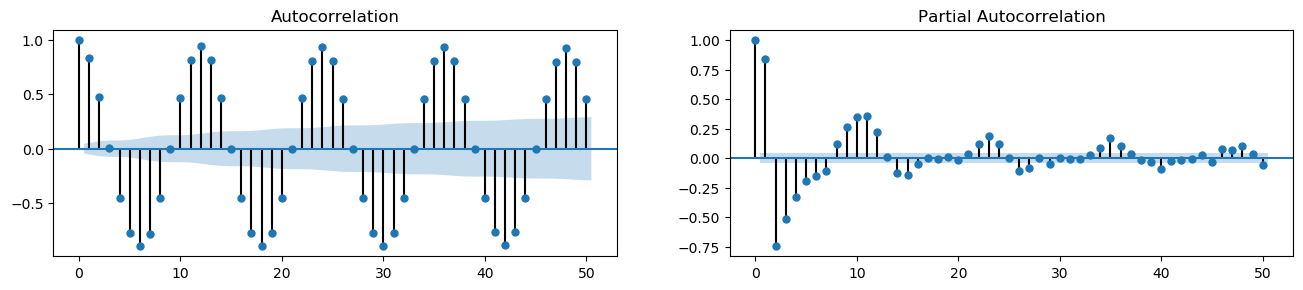

In [48]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


df = read_csv('./averageMonthlyTemperatureNZ.csv', usecols=['date'],parse_dates=['date'], index_col='date')
X = series.values
# Calculate ACF and PACF upto 50 lags
acf_50 = acf(X, nlags=50)
pacf_50 = pacf(X, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(X.tolist(), lags=50, ax=axes[0])
plot_pacf(X.tolist(), lags=50, ax=axes[1])




#### 3. Apply a moving average to the yearly temperature time series with a window size of 30. Display both the original yearly temperature time series and the moving average (30) smoothed time series:

In [ ]:
# ANSWER GOES HERE




#### 4. Find a good predictive model that uses the last 120 months of monthly temperature time series data and predicts temperature for the next 24 months:

In [ ]:
# ANSWER GOES HERE




Let's load a data set of atmosphere CO2 concentration over time

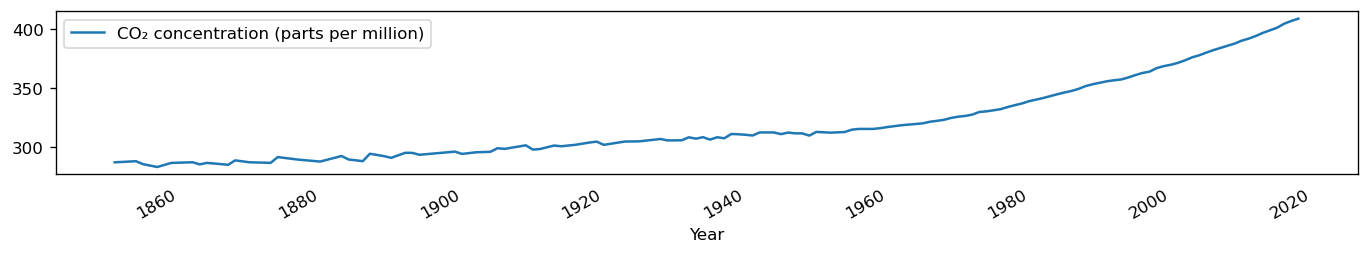

In [17]:
dfCo2=pd.read_csv('./co2.csv',index_col='Year',parse_dates=True)
dfCo2.plot()

#### 5. Now the million dollar question: Does increasing CO2 concentration in the atmosphere *cause* rising temperatures. Obviously, causality is a philosophically elusive concept. The fact that a phenomena precedes another in time is a necessary but not sufficient condition for true causality. Use the appropriate technique from time series analysis for suggestive (but perhaps not definite) evidence about whether rising CO2 *causes* rising global temperature. Use the yearly temperatures data frame. Note: this question requires you to play a bit with the data to merge it, fill missing values and then applying the appropriate statistical test. The point of this exercise is that you solve this question by researching and navigating the appropriate technical documentation

In [ ]:
# ANSWER GOES HERE




### TensorFlow

In this exercise you are supposed to train a simple two layer fully connected neural network to classify images of clothing, like sneakers and shirts. To do that, we will use the a fashion dataset which contains 70,000 grayscale images in 10 categories. Each image shows individual articles of clothing at low resolution (28 by 28 pixels):

<a id="clothingExercise"></a>
#### 6. Train the model on the training data and estimate its performance on the test data. You should shoot for accuracy above 80%. 

In [2]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#The data must be preprocessed before training the network. We can scale these values to a range of 0 to 1 before feeding them to the neural
#network model. To do that we simply divide by the maximum number in the data
train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig=plt.figure(figsize=(7,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]],fontsize=7)
fig.subplots_adjust(hspace=0.5)    
plt.show()

4423680/4422102 [==============================] - 3s 1us/step


<Figure size 700x500 with 25 Axes>

(60000, 28, 28)
(10000, 28, 28)

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 52us/sample - loss: 1.6884 - accuracy: 0.7806
Epoch 2/5
60000/60000 [==============================] - 3s 46us/sample - loss: 1.6329 - accuracy: 0.8304
Epoch 3/5
60000/60000 [==============================] - 3s 45us/sample - loss: 1.6113 - accuracy: 0.8513
Epoch 4/5
60000/60000 [==============================] - 3s 46us/sample - loss: 1.6028 - accuracy: 0.8597
Epoch 5/5
60000/60000 [======

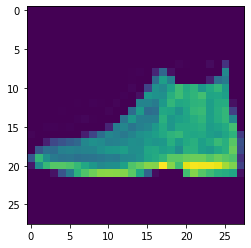

In [17]:
# ANSWER GOES HERE
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape)
print(x_test.shape)
plt.imshow(train_images[0])
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), #input layer. Input images have dimensions 28 by 28 pixels
  tf.keras.layers.Dense(128, activation='relu'), #The first layer contains 128 neurons. The relu activation function works very well for computer vision tasks
  tf.keras.layers.Dense(10,activation='softmax' ) #The second and final layer contains 10 neurons, one for each class of digits 0-9 we want to classify
                                                #The softmax is the appropriate activation function for the final layer of a neural network model destined for classification
])
predictions = model(x_train[np.newaxis,1]).numpy() 
# predictions = model(x_train[:1]).numpy() #alternative syntax
predictions
tf.nn.softmax(predictions).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)
plt.imshow(x_test[0])

## Text classification

The following script preprocesses a bunch of Tweets about different airlines in order to fit the data into a sentiment analysis model created in the next notebook cell. Don't worry about the technical details of this preprocessing, they are not necessary for the exercise.

In [33]:
# Basic packages
import pandas as pd 
import numpy as np
import tensorflow as tf
import re
import collections
import matplotlib.pyplot as plt
from pathlib import Path

# Packages for data preparation
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers


NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = 20  # Maximum number of words in a sequence

def remove_mentions(input_text):
    #Function to remove mentions, preceded by @, in a Pandas Series
    return re.sub(r'@\w+', '', input_text)

df = pd.read_csv('./Tweets.csv')
df = df.reindex(np.random.permutation(df.index))  
df = df[['text', 'airline_sentiment']]
df.text = df.text.apply(remove_mentions)

X_train, X_test, y_train, y_test = train_test_split(df.text, df.airline_sentiment, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

print("Raw data set")
print(X_train)

print(X_train[0])

tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               char_level=False,
               split=' ')
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

X_train_oh = tk.texts_to_matrix(X_train, mode='binary')
X_test_oh = tk.texts_to_matrix(X_test, mode='binary')

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0]))

X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1, random_state=37)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)

# Train data samples: 13176
# Test data samples: 1464
Raw data set
7477      come on! Already delayed 2+ hrs on flight 141...
8379      rather than trying to resolve customer issues...
3529      yes when I got to the gate I specifically ask...
844       Calls to 800# resulted in 2hrs of hold time &...
10842      How do I merge my miles accounts? Your sites...
                               ...                        
2968      FLT 3444 delayed because of maintenance - tha...
12672      . Apology not good enough. 4 planes with mec...
9470                                  how long for a reply
11983     said that AA does not provide in-flight wifi ...
2252      congratulations united. Fail again. Sky at a ...
Name: text, Length: 13176, dtype: object
 What  said.
Fitted tokenizer on 13176 documents
10000 words in dictionary
Top 5 most common words are: [('to', 7773), ('the', 5479), ('i', 4885), ('a', 4066), ('you', 3744)]
"neutral" is converted into 0
"0" is converted into [1. 0. 0.]
Shape

#### 7. What's wrong with the following model and its training? Provide a brief textual explanation. If there is something wrong, fix it and create a visualization that shows that you have improved the model and its training.

In [40]:
model = models.Sequential()

model.add(layers.Dense(2048, activation='relu', input_shape=(NB_WORDS,)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam'
              , loss='categorical_crossentropy'
              , metrics=['accuracy'])

history = model.fit(X_train_rest,y_train_rest,
                    epochs=10,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_valid, y_valid),
                    verbose=1)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 2048)              20482048  
_________________________________________________________________
dense_29 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_30 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_31 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_33 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_34 (Dense)             (None, 64)               

In [ ]:
# ANSWER GOES HERE




# Computer vision and Image Classification

#### 8. Build a convolutional neural network and train it on the fashion data set from the [Clothing recognition exercise](#clothingExercise). Don't worry about using a validation set. Just train on the training set and then estimate performance of the model on the test set. You should get a test set accuracy around or above 90%.

Train on 100 samples
Epoch 1/100
100/100 [==============================] - 0s 2ms/sample - loss: 30.4541
Epoch 2/100
100/100 [==============================] - 0s 50us/sample - loss: 1.0173
Epoch 3/100
100/100 [==============================] - 0s 50us/sample - loss: 1.0401
Epoch 4/100
100/100 [==============================] - 0s 40us/sample - loss: 1.2914
Epoch 5/100
100/100 [==============================] - 0s 50us/sample - loss: 1.0280
Epoch 6/100
100/100 [==============================] - 0s 50us/sample - loss: 0.9970
Epoch 7/100
100/100 [==============================] - 0s 40us/sample - loss: 1.0151
Epoch 8/100
100/100 [==============================] - 0s 50us/sample - loss: 1.0008
Epoch 9/100
100/100 [==============================] - 0s 40us/sample - loss: 0.9882
Epoch 10/100
100/100 [==============================] - 0s 50us/sample - loss: 1.0522
Epoch 11/100
100/100 [==============================] - 0s 50us/sample - loss: 0.9922
Epoch 12/100
100/100 [====================

100/100 [==============================] - 0s 40us/sample - loss: 1.0175
Epoch 97/100
100/100 [==============================] - 0s 60us/sample - loss: 1.0019
Epoch 98/100
100/100 [==============================] - 0s 40us/sample - loss: 1.0077
Epoch 99/100
100/100 [==============================] - 0s 60us/sample - loss: 0.9763
Epoch 100/100
100/100 [==============================] - 0s 50us/sample - loss: 1.0810


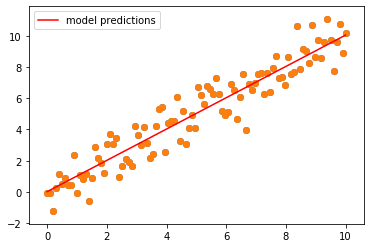

In [21]:
# ANSWER GOES HERE
# First we generate an artificial dataset

plt.scatter(X,Y)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=[1,]),
  ])
    
model.compile(optimizer='sgd', loss='mse')

# Train
model.fit(X, Y, epochs=100, verbose=1)
plt.plot(X,model.predict(X),color='red',label="model predictions")
plt.scatter(X,Y)
plt.legend()

#### 9. Use the ResNet50 Convolutional neural network model (pretrained on the ImageNet Challenge data set) and available in TensorFlow to classify the following image:
![](./images/church.jpg). 

In [ ]:
# ANSWER GOES HERE




# Transfer learning

In this exercise, you are required to use transfer learning, which means starting with a model that has already been trained on another but similar problem and retraining the last layers of the model on a specific problem set we are interested in. Creating a top-performing Deep learning model from scratch requires a huge training set of images and can take days in clusters of GPUs, but transfer learning can take advantage of that previous work and be done in short order.

We are going to use the Inception v3 network. Inception v3 is trained for the ImageNet Large Visual Recognition Challenge and it can differentiate between 1,000 different classes of objects on images, like dogs or dishwashers. We will use this same network, but retrain its top layers to tell apart a small number of classes (6) based on our own examples. Use the following data set for the retraining:

`I:\COURSES\ITP\BITY3\IN726-dsmi-data\dsmi_machine_vision_challenge.rar`

**Note: you can also find the data set in the Classroom Teams channel.**

`dsmi_machine_vision_challenge.rar` is a small data set with a few hundred images belonging to just 6 categories: electric guitar, elephant, human faces, helicopter, motorbikes and the ying-yang symbol. Your task is to create a computer vision model specialized in discriminating between this 5 categories of images.

#### 10. Retrain the  `InceptionV3` network model using transfer learning in TensorFlow. As noted in class, Inception is a huge image classification model with millions of parameters that can differentiate a large number of different image classes. You are only required to train the final layer of that network for our specific problems set, so training will end in a reasonable amount of time. You will need to do some research about the number of units you need in the last layer and the type of activation to use. You will also need to tinker with the kind of loss function that you want to use. I have already divided the data set into proper training, validation and test sets. You should get around 90% classification accuracy on the test set. We could get much higher accuracy if we would use more training data, but a few hundred images as provided in the linked data set should suffice for getting around 90% classification accuracy.

In [ ]:
# ANSWER GOES HERE




# Word embeddings

#### 11. Train a word2vec model on a small sample of text I gathered from Princeton University at `I:\COURSES\EAD\AITEIT3\BITY3\IN726-dsmi-data\princeton.csv`. (**Note: you can also find the data set in the Classroom Teams channel.**). Use word embeddings of 100 dimensions, window size of 10 and only incorporate words in the model vocabulary that occur at least 10 times in the corpus. 

if you want to optimize training speed, read this blog post on optimization of the algorithm:
- https://rare-technologies.com/word2vec-in-python-part-two-optimizing/
- https://rare-technologies.com/parallelizing-word2vec-in-python/

For better results you can use the training file `princetonFull.csv` which contains eight times more text, but training will take longer.

In [26]:
# ANSWER GOES HERE
!pip install gensim
import gensim
from gensim.models.word2vec import Word2Vec
import os
import pandas as pd

inputPath = os.path.normpath(r'.') 
fileName = 'princeton.csv'                             
inputFilePath = os.path.join(inputPath, fileName)                
df=pd.read_csv(inputFilePath)
df.head()

from gensim.parsing.preprocessing import * #provides a number of convenience preprocessing functions optimized for speed
import csv

def preprocessing(file):
    
    CUSTOM_FILTERS = [lambda x: x.lower(), #To lowercase
                      lambda text: re.sub(r'https?:\/\/.*\s', '', text, flags=re.MULTILINE), #To Strip away URLs
                      strip_tags, #Remove tags from s using RE_TAGS.
                      strip_non_alphanum,#Remove non-alphabetic characters from s using RE_NONALPHA.
                      strip_punctuation, #Replace punctuation characters with spaces in s using RE_PUNCT.
                      strip_numeric, #Remove digits from s using RE_NUMERIC.
                      strip_multiple_whitespaces,#Remove repeating whitespace characters (spaces, tabs, line breaks) from s and turns tabs & line breaks into spaces using RE_WHITESPACE.
                      remove_stopwords, # Set of 339 stopwords from Stone, Denis, Kwantes (2010).
                      lambda x: strip_short(x, minsize=3), #Remove words with length lesser than minsize from s.
                     ]

    csv.field_size_limit(2147483647)
    with open(file,'r', newline='',encoding="utf-8") as inpFile:

        csvObject = csv.reader(inpFile, delimiter=',',quotechar='"')

        wordThreshold=5 #Important: filter out sentences with less than wordThreshold words

        sentences = []
        for csvEntry in csvObject:
            if len(csvEntry)>1:
                lines = csvEntry[1].split('\n') #csvEntry[0] is url csvEntry[1] is text Fetched from URL

                for line in lines: #Different elements appear in their own line
                    words = preprocess_string(line,CUSTOM_FILTERS)

                    if len(words)>wordThreshold: #Important: filter out sentences with less than wordThreshold words
                        sentences.append(words)
    wordsInCorpus=0
    for i, s in enumerate(sentences):
        wordsInCorpus += len(s)
    print("Number of words in corpus:",wordsInCorpus)
    print("Number of sentences in corpus:",len(sentences))
    return sentences

sentences = preprocessing(inputFilePath)

Number of words in corpus: 3614743
Number of sentences in corpus: 178390


#### 12. Print the vector/word embedding for the word `king`:

In [27]:
# ANSWER GOES HERE



model = Word2Vec(sentences, # The sentences iterable can be simply a list of lists of tokens, but for larger corpora, consider an iterable that streams the sentences directly from disk/network
                 sg=0, #Defines the training algorithm. If 1, skip-gram is employed; otherwise, CBOW is used
                 size=100,#Dimensionality of the feature vectors
                 window=15,# The maximum distance between the current and predicted word within a sentence
                 min_count=5, #Ignores all words with total frequency lower than this
                 workers=4, #Use these many worker threads to train the model (=faster training with multicore machines).
                 iter = 5, # (int) – Number of iterations (epochs) over the corpus. //5
                )
model.wv['king']

array([-0.11727138, -0.5341742 ,  1.4201641 , -0.01750847, -1.7014207 ,
       -1.5658145 , -1.1758095 ,  0.7237399 , -1.1157408 , -2.243231  ,
        0.12305298, -1.411759  , -0.32151267,  0.05228134,  0.42132545,
       -0.21275246, -0.53475976, -0.2938355 , -0.88262874,  0.5740208 ,
       -1.0314505 , -0.01822886,  1.1027286 ,  1.5884259 ,  0.48433372,
       -1.050103  ,  1.324021  ,  1.3236223 ,  1.2803092 ,  0.5866409 ,
        1.2826986 ,  0.2569799 , -0.00426519,  1.24361   ,  0.9818103 ,
        0.06360273,  0.02390615,  2.6898103 , -0.89071405, -0.87388486,
       -0.16406618,  0.3144071 ,  2.0651798 , -0.9031927 ,  0.23594937,
        1.964258  ,  0.12547262,  0.23800969, -0.71969813, -0.7627963 ,
        0.02089219, -0.11758437, -2.15958   , -0.54436225, -0.34776527,
        0.06965057,  0.82604504,  0.13680199,  1.0825583 , -1.6801364 ,
        0.9599415 , -0.2361921 ,  1.5809567 ,  0.8030772 ,  1.648329  ,
       -0.24677666,  0.45962262,  1.0307634 , -1.5184693 ,  0.99

#### 13. What are the top 10 most similar words to the word `bike`? 

In [28]:
# ANSWER GOES HERE

model.wv.most_similar(positive=['bike'])


[('bikes', 0.924990177154541),
 ('bicycle', 0.8921830058097839),
 ('tigertransit', 0.8787699937820435),
 ('rent', 0.8460297584533691),
 ('ride', 0.8443936109542847),
 ('buses', 0.8427879810333252),
 ('carts', 0.8417637944221497),
 ('commute', 0.8360210657119751),
 ('bus', 0.8216331005096436),
 ('parking', 0.8175448179244995)]

#### 14. What is the cosine similarity between the words `programmer` and `software`? 

In [29]:
# ANSWER GOES HERE

model.wv.similarity('programmer', 'software')


0.3812004

#### 15. What are the closest vectors to the result of adding the vectors for `disease` and `brain`?

In [35]:
# ANSWER GOES HERE

model.most_similar(positive=['disease','brain'])


C:\Users\Bex.0\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('disorders', 0.8219870924949646),
 ('diseases', 0.8040326237678528),
 ('infectious', 0.7800767421722412),
 ('neurological', 0.772392749786377),
 ('autism', 0.7651026248931885),
 ('aging', 0.7637509107589722),
 ('developmental', 0.7563261985778809),
 ('alzheimer', 0.7537367343902588),
 ('neuronal', 0.7533034086227417),
 ('brains', 0.7239332795143127)]

#### 16. Use your model to guess an answer to the following analogy: `Madrid is to Spain as London is to...`

In [37]:
# ANSWER GOES HERE

model.most_similar(positive=['london','spain'], negative=['madrid'])



C:\Users\Bex.0\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('england', 0.764877438545227),
 ('jerusalem', 0.7051408290863037),
 ('stuttgart', 0.6722074151039124),
 ('translated', 0.6692992448806763),
 ('france', 0.6624044179916382),
 ('gospels', 0.6572828888893127),
 ('rome', 0.652129054069519),
 ('egypt', 0.6491011381149292),
 ('french', 0.6441558003425598),
 ('edition', 0.642169713973999)]

#### 17. Plot your word embeddings after applying t-SNE dimensionality reduction for the following words:
```
biology, chemistry, history, literature, lecturer, professor, undergraduates, students, swimming, running, rowing
```

C:\Users\Bex.0\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


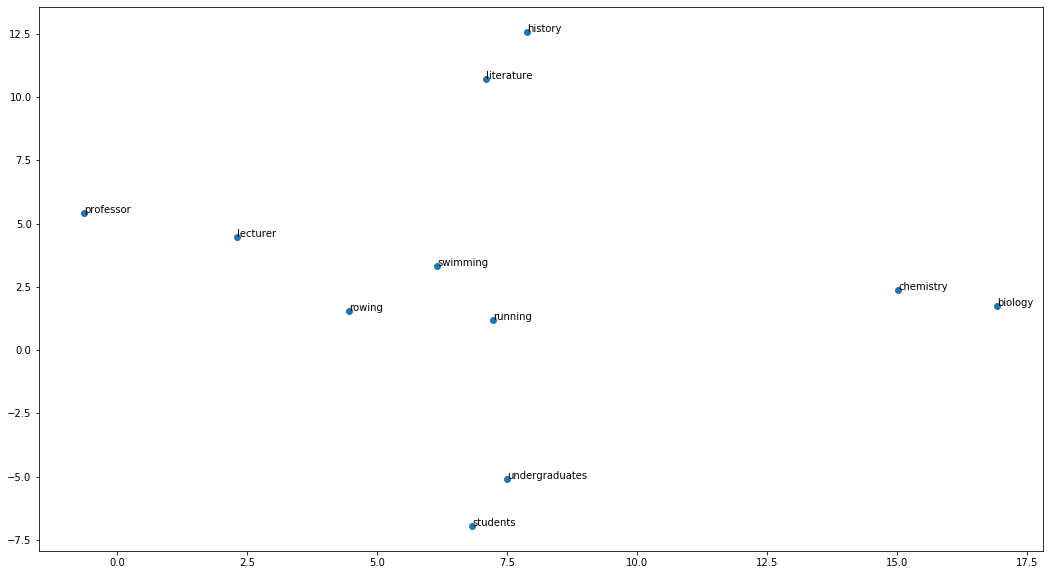

In [40]:
# ANSWER GOES HERE
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

d= {}

d['biology']=model.wv.vocab['biology']
d['chemistry']=model.wv.vocab['chemistry']
d['history']=model.wv.vocab['history']
d['literature']=model.wv.vocab['literature']
d['lecturer']=model.wv.vocab['lecturer']
d['professor']=model.wv.vocab['professor']
d['undergraduates']=model.wv.vocab['undergraduates']
d['students']=model.wv.vocab['students']
d['swimming']=model.wv.vocab['swimming']
d['running']=model.wv.vocab['running']
d['rowing']=model.wv.vocab['rowing']



vocab = list(d)

X = model[vocab]

tsne = TSNE(perplexity=3, n_components=2, learning_rate=1, init='random',random_state=3, n_iter=2000)

X_tsne = tsne.fit_transform(X)

df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)

df.columns = ['x', 'y', 'word']

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for i, txt in enumerate(df['word']):
    ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))



# Neural Networks for Sequence data

The signal `seriesSum` in red below is composed of a high frequency component (`series1` in blue) and a low frequency component (`series2` in green) 

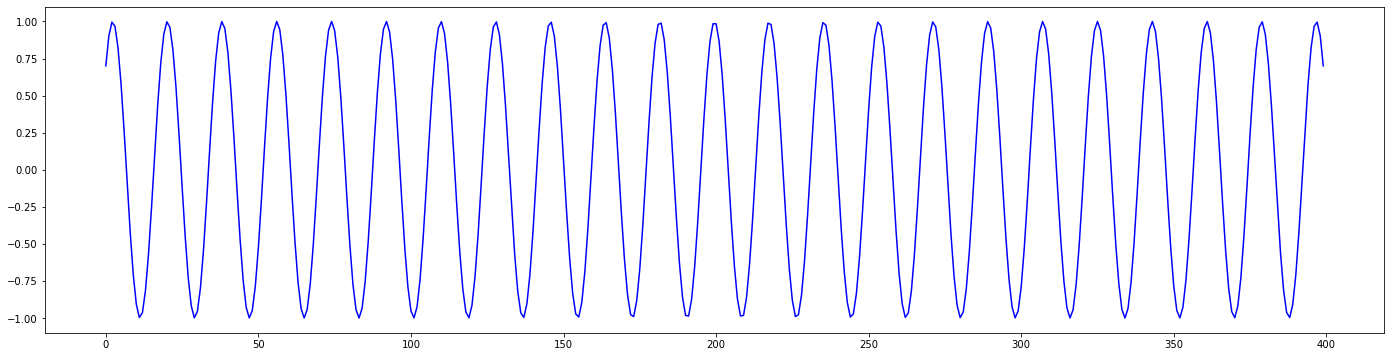

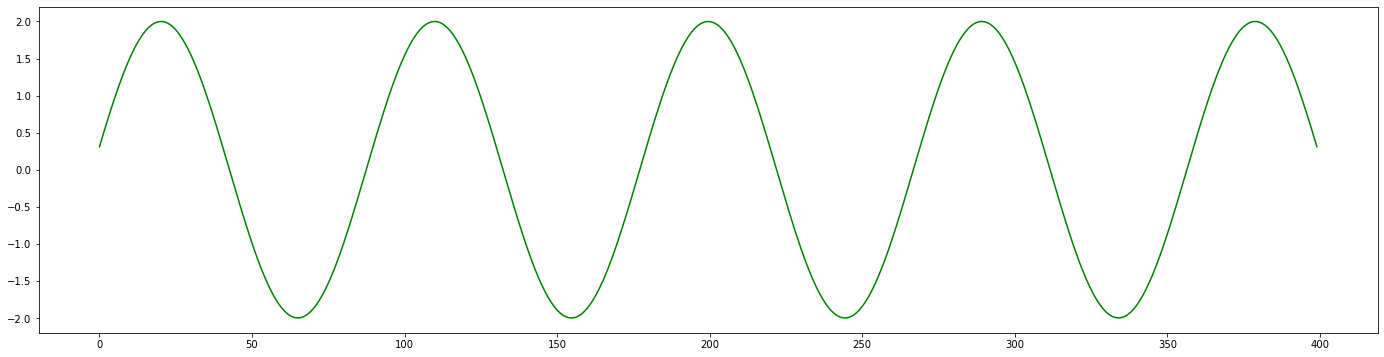

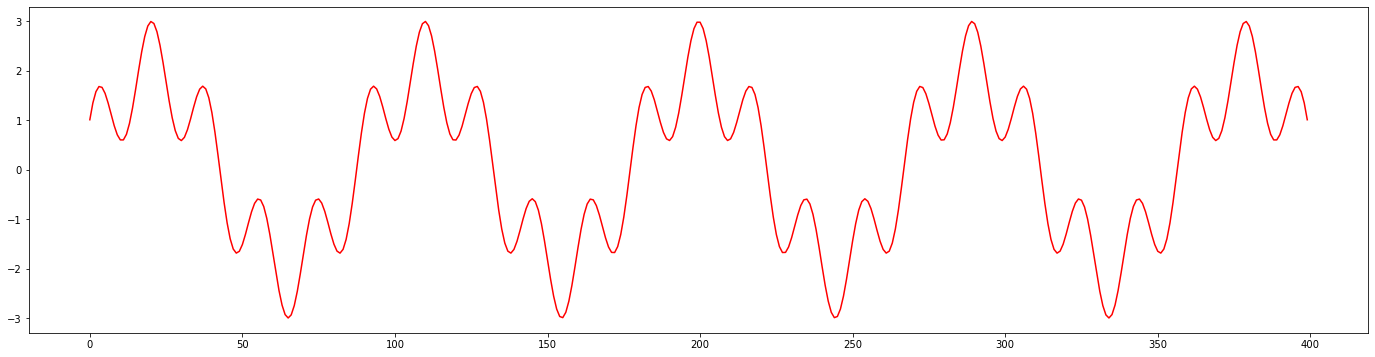

In [2]:
#for n in range(1,5):
import matplotlib.pyplot as plt
import numpy
x = numpy.linspace(-5,5,num=400)
series1 = numpy.cos(1e4/2*x)
series2 = 2*numpy.cos(1e4/10*x)
seriesSum=series1+series2
plt.rcParams["figure.figsize"] = [24,6]
plt.plot(series1,c='b')
plt.show()
plt.plot(series2,c='g')
plt.show()
plt.plot(seriesSum,c='r')

#### 18. Create the appropriate type of neural network that using two thirds of the time series for training is able to predict the rest of the time series. Plot the predictions on both the training and the test data. You should get a prediction accuracy like the picture below or better.

![](./images/tsp.png)

In [ ]:
# ANSWER GOES HERE




## Neural style transfer

#### 19. Select two images of your own choosing: a target and a style. Apply the style to your target using the VGG19 computer vision model.

In [ ]:
# ANSWER GOES HERE




# Using IBM Watson web services (AI over API):

Create a script that using IBM Watson remote AI APIs does the following:

#### 20. Detects the language in the following string of text

> Parlare è facile. Mostrami il codice

In [ ]:
# ANSWER GOES HERE




#### 21. Translates the sentence to English

In [ ]:
# ANSWER GOES HERE




#### 22. Synthesizes the resulting translation into a male voice in English and writes that to a wav file.

In [ ]:
# ANSWER GOES HERE




## Transformers

#### 23. Use a transformer model to obtain vector representations of the words in the following sentences. Then compare the cosine similarity between the different senses with which the word *bank* is being used in the sentences. Explain the results you get.

In [8]:
sentence1 = 'I sat by river bank'
sentence2 = 'I went to the bank to get a mortgage'
sentence3 = 'My bank is not lending me any money'

In [ ]:
# ANSWER GOES HERE




#### 24. The following text is taken from the Wikipedia entry about Apollo 11 mission to the surface of the moon. Use a transformer model to get an answer to the question providing as context the *wikipediaApollo11* text:
    > What were Neil Armstrong first words on the surface of the moon?

In [21]:
wikipediaApollo11 = """
Apollo 11 was the spaceflight that first landed humans on the Moon. Commander Neil Armstrong and lunar module pilot Buzz Aldrin
formed the American crew that landed the Apollo Lunar Module Eagle on July 20, 1969, at 20:17 UTC. Armstrong became the first
person to step onto the lunar surface six hours and 39 minutes later on July 21 at 02:56 UTC; Aldrin joined him 19 minutes later.
They spent about two and a quarter hours together outside the spacecraft, and they collected 47.5 pounds (21.5 kg) of lunar
material to bring back to Earth. Command module pilot Michael Collins flew the Command Module Columbia alone in lunar orbit 
while they were on the Moon's surface. Armstrong and Aldrin spent 21 hours, 36 minutes on the lunar surface at a site they 
named Tranquility Base before lifting off to rejoin Columbia in lunar orbit. After being sent to the Moon by the Saturn V's
third stage, the astronauts separated the spacecraft from it and traveled for three days until they entered lunar orbit.
Armstrong and Aldrin then moved into Eagle and landed in the Sea of Tranquility on July 20. The astronauts used Eagle's ascent
stage to lift off from the lunar surface and rejoin Collins in the command module. They jettisoned Eagle before they performed 
the maneuvers that propelled Columbia out of the last of its 30 lunar orbits onto a trajectory back to Earth. They returned 
to Earth and splashed down in the Pacific Ocean on July 24 after more than eight days in space. Armstrong's first step onto
the lunar surface was broadcast on live TV to a worldwide audience. He described the event as "one small step for a man, one 
giant leap for mankind." Apollo 11 effectively ended the Space Race and fulfilled a national goal proposed in 1961 by President
John F. Kennedy: "before this decade is out, of landing a man on the Moon and returning him safely to the Earth."
"""

# ANSWER GOES HERE




#### 25. The following is an article that appeared in 2008 on the Wall Street Journal during the midst of a financial crisis. Use a transformer model to identify automatically all the organizations (i.e. companies) that appear in the article. Also Tokenize the article into independent sentences (you can use the TextBlob library for easily doing that). Then, also using a transformer model, analyze the sentiment of each sentence that contains a previously identified organization name. Tally the sentiment associated to each sentence were an organization appears and provide an overall estimate of the sentiment with which a given organization is associated in this article. Your output should allow anyone inspecting it to clearly identify the organization/s that is associated with the most positive/negative sentiments.

In [36]:
wsjArticle="""Consolidation in the air is once again in the air, so to speak. But is the business case for airline mergers any 
stronger today than two years ago, when this column rained on a similar parade? US Airways' Doug Parker, ironically one of the 
most consistent voices in favor of consolidation, recently offered in a conference call a hymn of praise to his competitors 
for aggressively cutting capacity to protect margins despite softening traffic. He placed his finger accurately on the 
recurrent source of airline grief -- too many seats chasing too few passengers in a travel slump. Downturns in the last 15 
years have twice wiped out all the profits the industry earned since Wilbur and Orville put wings on a bicycle. Yet now 
Mr. Parker says his fellow skippers' latest efforts to keep available seats in line with demand represent a "pivotal and 
probably momentous change in our industry." If airlines are able (for once) to maintain margins in a slump, what's the urgency
of consolidation? Good question. Mergers have been touted for decades as a cure for airline woes. But the costs and pain of a 
merger -- including labor strife and incompatible fleets and maintenance routines -- are borne by the merging parties, while 
the alleged benefits -- less competition, higher fares -- are shared equally by competitors. Why be the sucker in this scenario?
A few costs at headquarters and the gate might be reduced, but how would a merger cut fuel or crew costs? Planes already are 
flying 80% to 85% full, leaving little scope for consolidation of passenger loads. And parking planes in the desert is a quicker
, cheaper way to reduce capacity in a travel recession. It's hard to see how consolidation would help much here, in the short 
term anyway. So why the merger talk? United's Glenn Tilton has been a chief perpetrator, but United has been at a loss about 
how to control costs (read pilots) well enough to avoid falling back into bankruptcy. And Delta is under pressure from hedge 
funds to seek a deal with either United or Northwest, though Delta's board could yet shrink from a tie-up. Both airlines are 
special cases -- with shareholders and/or executives eager to trigger a "liquidity event" to get out of their stock positions.
Yet now comes the backflip. On the radar screen are two new motivations for mergers -- one good, the other a national disaster
in the making. In March, a new "Open Skies" arrangement with the European Union will allow U.S. carriers to fly at will across
the Atlantic, and between European airports. Somebody somewhere in airline suites undoubtedly is thinking how to get ahead in 
the scramble to reorganize his feeder networks and international gateways to capture a bigger share of this high-margin traffic.
Another reason mergers may finally be on the in-flight menu is a less happy one -- the U.S. air travel system's catastrophic
devolution toward capacity-rationing by delay. Blame the FAA. Over the past 20 years, the agency has been utterly defeated by
its own bureaucratic and budgetary unsuitability to manage the complex technological upgrades required to keep pace with 
traffic growth. The consequences are already visible. Network airlines are withdrawing service, even profitable service, 
from smaller cities because it displaces more profitable traffic at congested hubs. Airline execs have been predicting for
years that rationing was just around the corner. The corner has arrived. The agency simply can't accommodate the billion 
passengers that, at current growth rates, would be seeking to fly in 2015. Economic prosperity and travel demand no longer
will determine the size of the aviation market. There will only be as much flying as the FAA's antiquated systems can permit.
Ill is the wind that doesn't blow somebody a kiss, and such an environment is naturally more conducive to oligopoly pricing.
Straitened capacity and growing politicization of the process by which take-off and landing slots are meted out will tend to
favor incumbents over startups and interlopers, such as the low-cost carriers that once kept fares down and undermined any 
claim that consolidation among the majors might bring less competition. Blame Congress. Presidents of both parties have argued
for liberating the ATC system from the congressional budget morass, but Congress is loath to give up its vast patronage
privileges. William Ris, head of government relations for American Airlines, points to a related problem: Lawmakers "react 
first as customers and only secondly as policy makers." Congressional leaders fly constantly, and are no more analytical than
the arthritic grandmother stuffed into seat 23A about the reasons for delays and cancellations. Instead, we get angry hearings
blaming the airlines for "overscheduling." We get people like Chuck Schumer haranguing Delta for canceling service to 
Binghamton. We get Barbara Boxer telling airlines when they must taxi back to the terminal and let passengers get off a plane
whose takeoff has been delayed, though the cause of delays is usually the ATC system. Blame the airlines. The major carriers
have gone AWOL in the fight for a reformed FAA. After 20 years of frustration, they no longer lobby or argue the case within
hearing of the public. When the final meltdown occurs, expect the big incumbents cheerfully to repair to a congressional
smoke-free room and divide up the system's limited capacity to the benefit of the big incumbents."""

# ANSWER GOES HERE




# Deliverables

#### 26. Hand in a single python notebook file (.ipynb) and the images from the TensorBoard exercise. Do not include any data sets in your GitHub repository!!! Use separate code cells to organize your code. Name your Python notebook according to the following pattern: *yourLastName_DSMI_A2.ipynb*. Create your own private repository for you to work on the Assignment by using the following link: 
[https://classroom.github.com/a/nqPvsvGQ](https://classroom.github.com/a/nqPvsvGQ)
The notebook file should be available in your own private GitHub repository “https://github.com/OPClasses2/assignment2-YourGithubUserName” and I will be able to fetch it from there. 

---